#### Reading data from FLIGHTDELAY TABLE AND CREATING SPARK DATAFRAME

In [0]:
df = sqlContext.table("FLIGHTDELAY")

In [0]:
df.printSchema()

root
-- Year: integer (nullable = true)
-- Quarter: integer (nullable = true)
-- Month: integer (nullable = true)
-- DayofMonth: integer (nullable = true)
-- DayOfWeek: integer (nullable = true)
-- FlightDate: string (nullable = true)
-- Reporting_Airline: string (nullable = true)
-- DOT_ID_Reporting_Airline: integer (nullable = true)
-- IATA_CODE_Reporting_Airline: string (nullable = true)
-- Tail_Number: string (nullable = true)
-- Flight_Number_Reporting_Airline: integer (nullable = true)
-- OriginAirportID: integer (nullable = true)
-- OriginAirportSeqID: integer (nullable = true)
-- OriginCityMarketID: integer (nullable = true)
-- Origin: string (nullable = true)
-- OriginCityName: string (nullable = true)
-- OriginState: string (nullable = true)
-- OriginStateFips: integer (nullable = true)
-- OriginStateName: string (nullable = true)
-- OriginWac: integer (nullable = true)
-- DestAirportID: integer (nullable = true)
-- DestAirportSeqID: integer (nullable = true)
-- DestCityMarketID: integer (nullable = true)
-- Dest: string (nullable = true)
-- DestCityName: string (nullable = true)
-- DestState: string (nullable = true)
-- DestStateFips: integer (nullable = true)
-- DestStateName: string (nullable = true)
-- DestWac: integer (nullable = true)
-- CRSDepTime: integer (nullable = true)
-- DepTime: integer (nullable = true)
-- DepDelay: double (nullable = true)
-- DepDelayMinutes: string (nullable = true)
-- DepDel15: double (nullable = true)
-- DepartureDelayGroups: integer (nullable = true)
-- DepTimeBlk: string (nullable = true)
-- TaxiOut: double (nullable = true)
-- WheelsOff: integer (nullable = true)
-- WheelsOn: integer (nullable = true)
-- TaxiIn: double (nullable = true)
-- CRSArrTime: integer (nullable = true)
-- ArrTime: integer (nullable = true)
-- ArrDelay: string (nullable = true)
-- ArrDelayMinutes: double (nullable = true)
-- ArrDel15: double (nullable = true)
-- ArrivalDelayGroups: integer (nullable = true)
-- ArrTimeBlk: string (nullable = true)
-- Cancelled: double (nullable = true)
-- CancellationCode: string (nullable = true)
-- Diverted: double (nullable = true)
-- CRSElapsedTime: double (nullable = true)
-- ActualElapsedTime: double (nullable = true)
-- AirTime: double (nullable = true)
-- Flights: double (nullable = true)
-- Distance: double (nullable = true)
-- DistanceGroup: integer (nullable = true)
-- CarrierDelay: double (nullable = true)
-- WeatherDelay: double (nullable = true)
-- NASDelay: double (nullable = true)
-- SecurityDelay: double (nullable = true)
-- LateAircraftDelay: double (nullable = true)
-- FirstDepTime: integer (nullable = true)
-- TotalAddGTime: double (nullable = true)
-- LongestAddGTime: double (nullable = true)
-- DivAirportLandings: integer (nullable = true)
-- DivReachedDest: double (nullable = true)
-- DivActualElapsedTime: double (nullable = true)
-- DivArrDelay: double (nullable = true)
-- DivDistance: double (nullable = true)
-- Div1Airport: string (nullable = true)
-- Div1AirportID: integer (nullable = true)
-- Div1AirportSeqID: integer (nullable = true)
-- Div1WheelsOn: integer (nullable = true)
-- Div1TotalGTime: double (nullable = true)
-- Div1LongestGTime: double (nullable = true)
-- Div1WheelsOff: integer (nullable = true)
-- Div1TailNum: string (nullable = true)
-- Div2Airport: string (nullable = true)
-- Div2AirportID: integer (nullable = true)
-- Div2AirportSeqID: integer (nullable = true)
-- Div2WheelsOn: integer (nullable = true)
-- Div2TotalGTime: double (nullable = true)
-- Div2LongestGTime: double (nullable = true)
-- Div2WheelsOff: integer (nullable = true)
-- Div2TailNum: string (nullable = true)
-- Div3Airport: string (nullable = true)
-- Div3AirportID: integer (nullable = true)
-- Div3AirportSeqID: integer (nullable = true)
-- Div3WheelsOn: integer (nullable = true)
-- Div3TotalGTime: double (nullable = true)
-- Div3LongestGTime: double (nullable = true)
-- Div3WheelsOff: integer (nullable = true)
-- Div3TailNum: string (nullable = true)
-- Div4Ai

What is the optimal time of day of the week or time of the years that is best to fly with minimal delays?

##### Minimum, Maximum, Average Delays for day of the week

In [0]:
%sql

SELECT DAYOFWEEK, min(DEPDELAY), max(DEPDELAY), AVG(DEPDELAY)
FROM FLIGHTDELAY
WHERE DEPDELAY > 0
GROUP BY DAYOFWEEK;

DAYOFWEEK,min(DEPDELAY),max(DEPDELAY),avg(DEPDELAY)
1,1.0,2208.0,35.93562991623483
6,1.0,1878.0,32.79050416729651
3,1.0,2755.0,33.91459219959184
5,1.0,2482.0,35.016328880055426
4,1.0,2710.0,35.09648955711515
7,1.0,2672.0,34.56066061890658
2,1.0,1979.0,34.24890266623809


In [0]:
%sql

SELECT AIRTIME, DEPDELAY
FROM FLIGHTDELAY
WHERE DEPDELAY > 0;

AIRTIME,DEPDELAY
21.0,2.0
22.0,7.0
20.0,3.0
21.0,3.0
22.0,3.0
30.0,22.0
27.0,1.0
29.0,1.0
29.0,2.0
27.0,1.0


In [0]:
%sql

SELECT DAYOFWEEK, min(DEPDELAY), max(DEPDELAY), AVG(DEPDELAY)
FROM FLIGHTDELAY
WHERE DEPDELAY > 0
GROUP BY DAYOFWEEK;

DAYOFWEEK,min(DEPDELAY),max(DEPDELAY),avg(DEPDELAY)
1,1.0,2208.0,35.93562991623483
6,1.0,1878.0,32.79050416729651
3,1.0,2755.0,33.91459219959184
5,1.0,2482.0,35.016328880055426
4,1.0,2710.0,35.09648955711515
7,1.0,2672.0,34.56066061890658
2,1.0,1979.0,34.24890266623809


In [0]:
from pyspark.sql.functions import stddev

In [0]:
display(df.filter("DepDelay>0").select('DayOfWeek','DepDelay').groupBy("DayOfWeek").agg(stddev('DepDelay')))

DayOfWeek,stddev_samp(DepDelay)
1,61.28348145461699
6,59.71856914587825
3,58.28376424098855
5,60.14660719249607
4,59.012912454084876
7,61.06363433906937
2,58.8021922229985


In [0]:
data = df.filter("DepDelay>0").select('Year', 'Month', 'DayOfWeek', 'DepDelay').toPandas()

In [0]:
data.head()

Out[4]:

,Year,Month,DayOfWeek,DepDelay
0,2019,1,4,2.0
1,2019,1,5,7.0
2,2019,1,6,3.0
3,2019,1,4,3.0
4,2019,1,5,3.0


Out[5]:

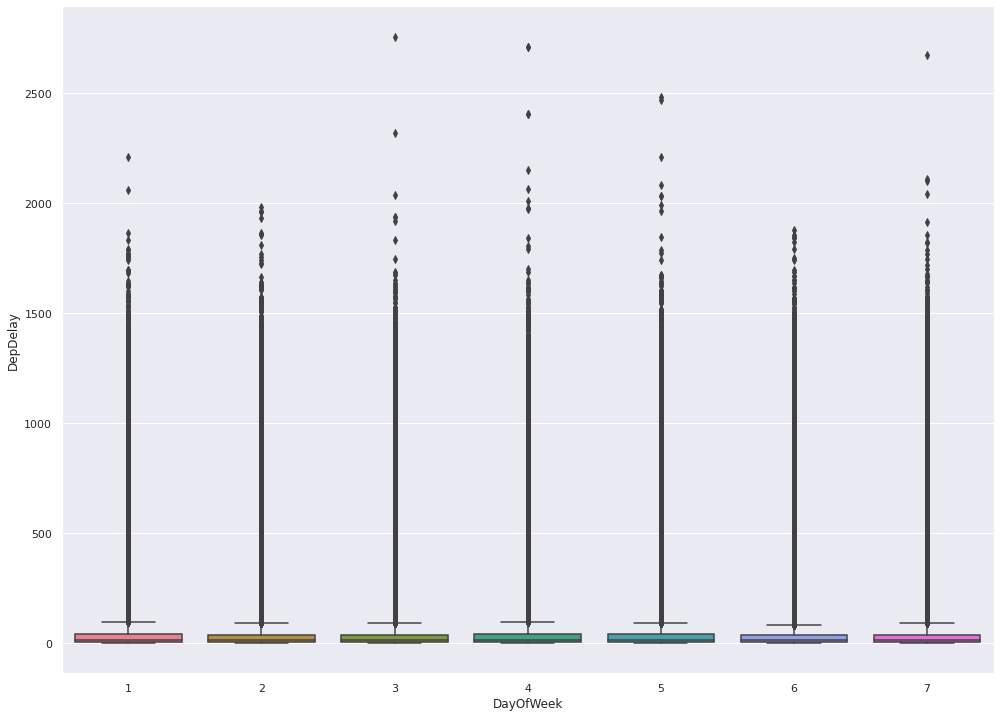

<AxesSubplot:xlabel='DayOfWeek', ylabel='DepDelay'>

In [0]:
import seaborn as sns
sns.set(style="white")
sns.set(rc={'figure.figsize':(16.7, 12.27)})

sns.boxplot(x = data['DayOfWeek'],
            y = data['DepDelay'],
            palette = 'husl'
            )

Out[14]:

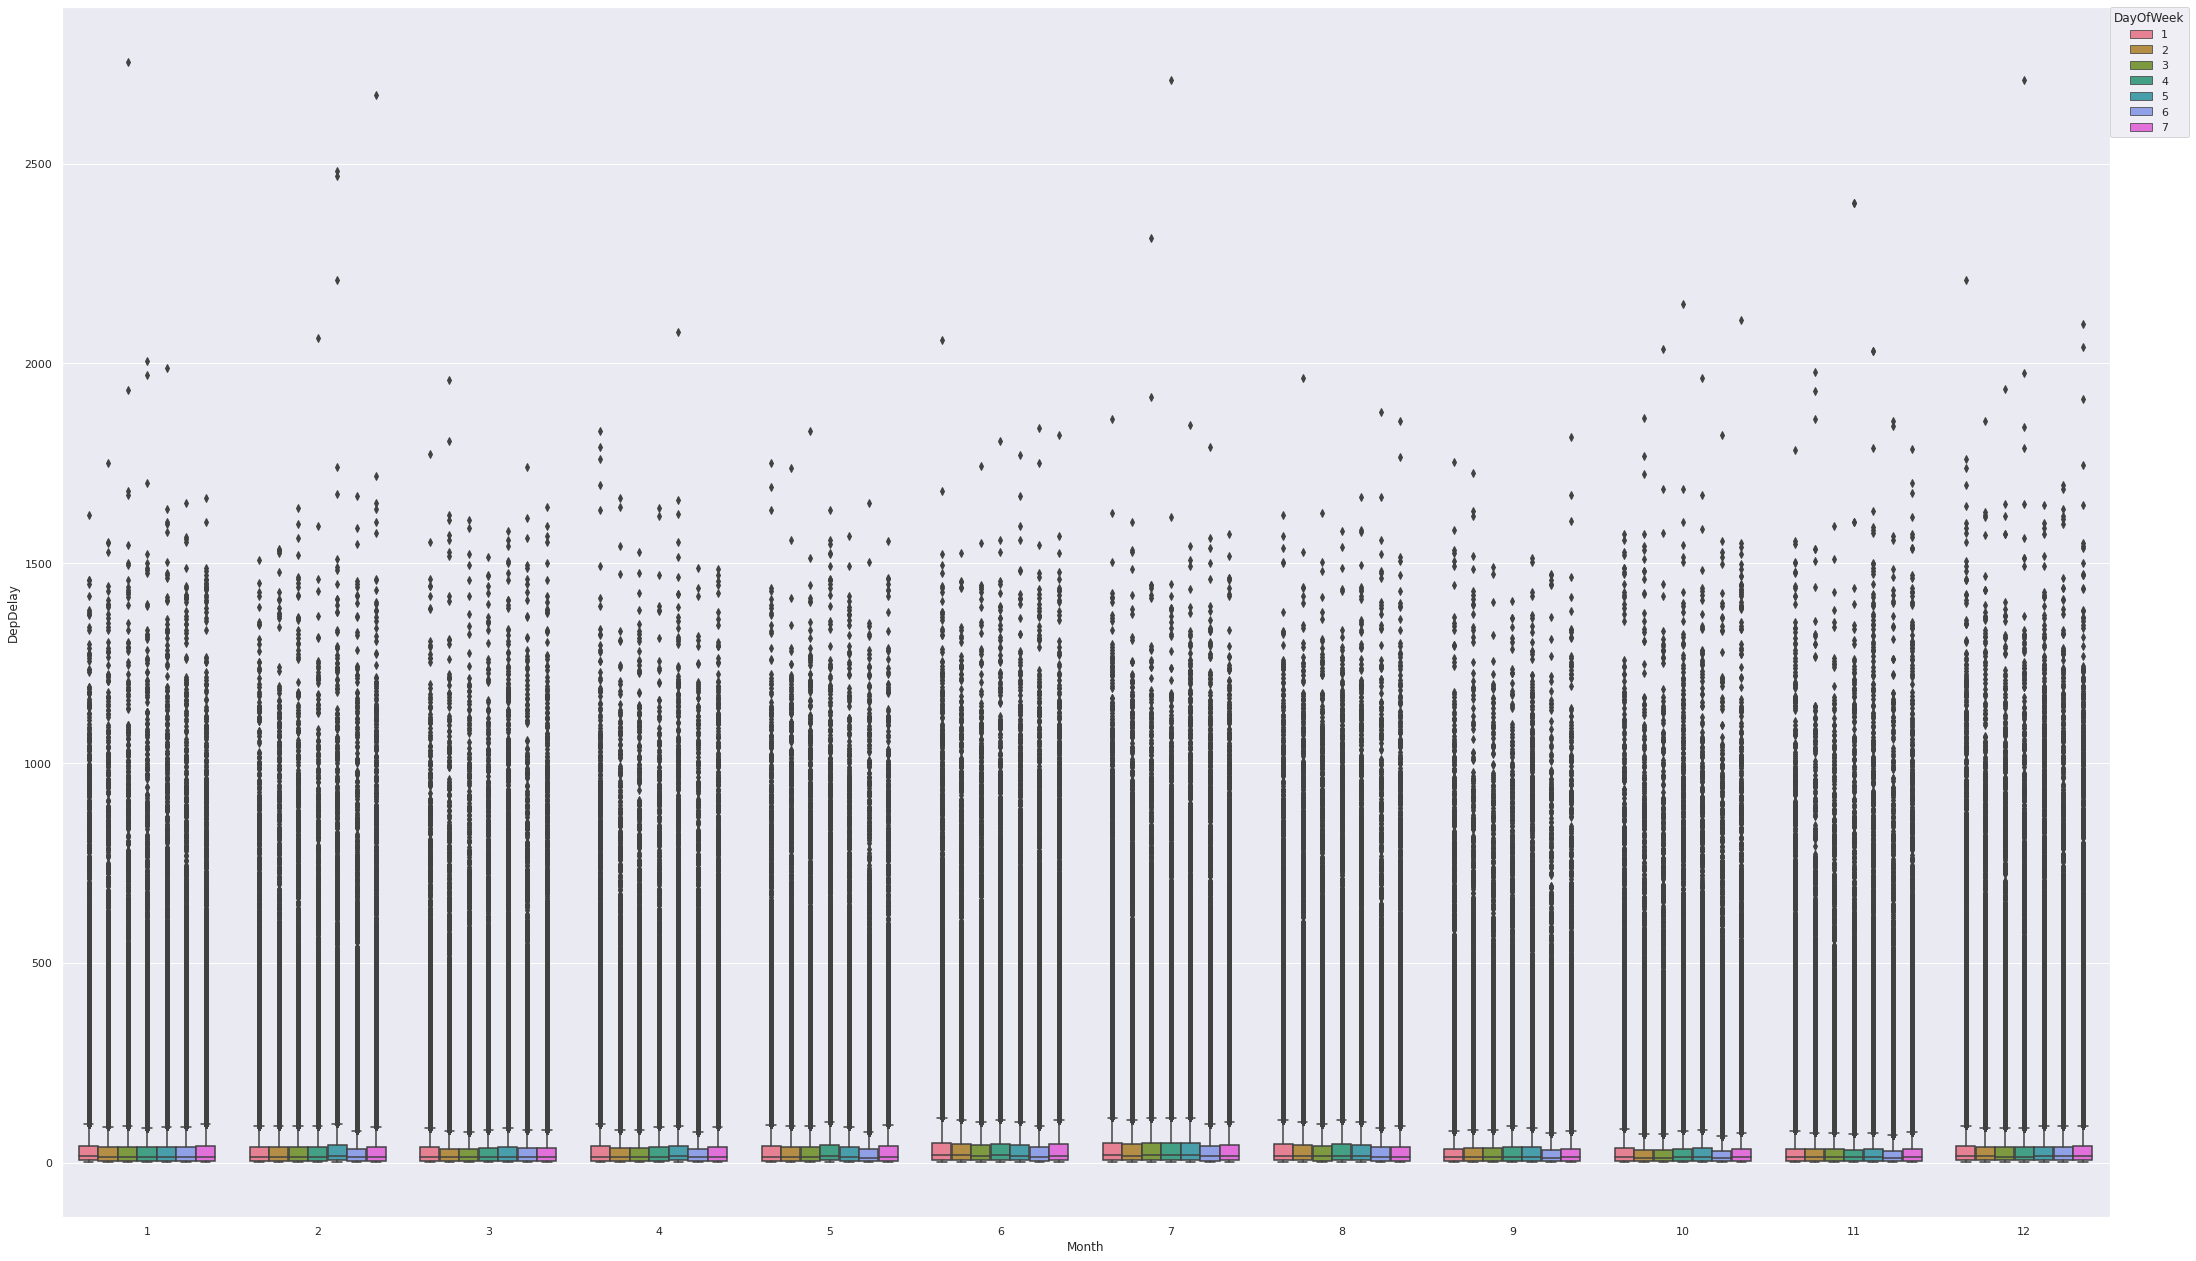

<matplotlib.legend.Legend at 0x7f08a4089d60>

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")
sns.set(rc={'figure.figsize':(36.7, 22.27)})

sns.boxplot(x = data['Month'],
            y = data['DepDelay'],
            hue = data['DayOfWeek'],
            palette = 'husl'
            )
plt.legend(bbox_to_anchor=(1.0001, 1), loc='upper left', borderaxespad=0, title="DayOfWeek")

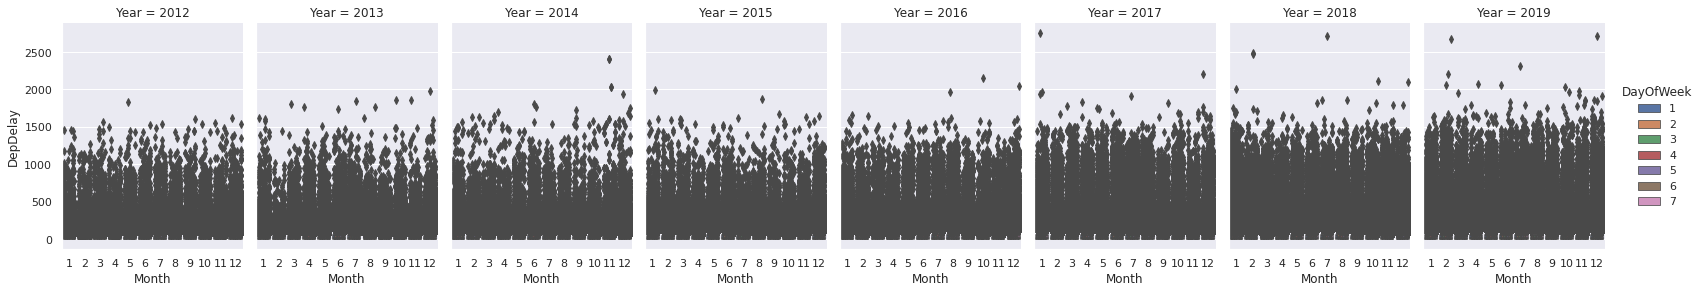

In [0]:
g = sns.catplot(x="Month", y="DepDelay",
                hue="DayOfWeek", col="Year",
                data=data, kind="box",
                height=4, aspect=.7);

Predicting Optimal time of Week to fly with minimal delays

In [0]:
%sql 

SELECT ra.DESCRIPTION AS AIRLINE, t.AVG_DEPARTURE_DELAY
FROM (SELECT REPORTING_AIRLINE, AVG(DEPDELAY) AS AVG_DEPARTURE_DELAY
FROM FLIGHTDELAY
WHERE DEPDELAY is not null 
AND DEPDELAY > 0
GROUP BY REPORTING_AIRLINE
ORDER BY AVG_DEPARTURE_DELAY DESC) t
JOIN REPORTINGAIRLINECODE ra
ON t.REPORTING_AIRLINE = ra.code
ORDER BY t.AVG_DEPARTURE_DELAY DESC

AIRLINE,AVG_DEPARTURE_DELAY
Endeavor Air Inc.,50.092013052483104
Republic Airline,49.269738491907844
Mesa Airlines Inc.,48.82260213369675
Allegiant Air,47.814952904238616
ExpressJet Airlines LLC d/b/a aha!,46.65465422129587
SkyWest Airlines Inc.,45.36235910666667
Spirit Air Lines,43.99514548649373
JetBlue Airways,43.68150206117213
PSA Airlines Inc.,41.991898700060126
Frontier Airlines Inc.,41.48508907641084


In [0]:
%sql

SELECT *
FROM DELAY_GROUPS

Code,Description
-2,Delay < -15 minutes
-1,Delay between -15 and -1 minutes
0,Delay between 0 and 14 minutes
1,Delay between 15 to 29 minutes
2,Delay between 30 to 44 minutes
3,Delay between 45 to 59 minutes
4,Delay between 60 to 74 minutes
5,Delay between 75 to 89 minutes
6,Delay between 90 to 104 minutes
7,Delay between 105 to 119 minutes


In [0]:
df.na.drop(subset=["DepartureDelayGroups"]).groupBy('DepartureDelayGroups').count().sort('DepartureDelayGroups').show()

+--------------------+--------+
DepartureDelayGroups| count|
+--------------------+--------+
 -2| 211797|
 -1|28402938|
 0|11481710|
 1| 3356966|
 2| 1722075|
 3| 1059517|
 4| 710248|
 5| 504598|
 6| 371986|
 7| 281904|
 8| 215289|
 9| 166471|
 10| 131914|
 11| 103811|
 12| 462293|
+--------------------+--------+

The DepartureDelayGroup has the interval of 15 minutes. But we would like to set the minimal delay as atmost 5 minutes of delay. Therefore, we will set the group column(target column) manually.

In [0]:
from pyspark.sql.functions import lit, when

raw_data = df.na.drop(subset=["DepDelayMinutes"]) \
    .withColumn("isMinimalDelay",
        when((df.DepDelayMinutes <= 3), lit(1)) \
            .otherwise(lit(0))) \
    .select(
        "Month",
        "DayOfWeek",
        "Origin",
        "Dest",
        "AirTime",
        "Distance",
        "isMinimalDelay"
)
display(raw_data)

Month,DayOfWeek,Origin,Dest,AirTime,Distance,isMinimalDelay
1,5,HNL,OGG,19.0,100.0,1
1,6,HNL,OGG,22.0,100.0,1
1,7,HNL,OGG,22.0,100.0,1
1,1,HNL,OGG,19.0,100.0,1
1,2,HNL,OGG,22.0,100.0,1
1,3,HNL,OGG,23.0,100.0,1
1,4,HNL,OGG,21.0,100.0,1
1,5,HNL,OGG,22.0,100.0,0
1,6,HNL,OGG,20.0,100.0,1
1,7,HNL,OGG,20.0,100.0,1


In [0]:
raw_data = raw_data.na.drop()

In [0]:
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCols=["Origin", "Dest"], outputCols=["Origin_cat", "Dest_cat"])
indexed_data = indexer.fit(raw_data).transform(raw_data)

In [0]:
indexed_data.show()

+-----+---------+------+----+-------+--------+--------------+----------+--------+
Month|DayOfWeek|Origin|Dest|AirTime|Distance|isMinimalDelay|Origin_cat|Dest_cat|
+-----+---------+------+----+-------+--------+--------------+----------+--------+
 1| 5| HNL| OGG| 19.0| 100.0| 1| 34.0| 52.0|
 1| 6| HNL| OGG| 22.0| 100.0| 1| 34.0| 52.0|
 1| 7| HNL| OGG| 22.0| 100.0| 1| 34.0| 52.0|
 1| 1| HNL| OGG| 19.0| 100.0| 1| 34.0| 52.0|
 1| 2| HNL| OGG| 22.0| 100.0| 1| 34.0| 52.0|
 1| 3| HNL| OGG| 23.0| 100.0| 1| 34.0| 52.0|
 1| 4| HNL| OGG| 21.0| 100.0| 1| 34.0| 52.0|
 1| 5| HNL| OGG| 22.0| 100.0| 0| 34.0| 52.0|
 1| 6| HNL| OGG| 20.0| 100.0| 1| 34.0| 52.0|
 1| 7| HNL| OGG| 20.0| 100.0| 1| 34.0| 52.0|
 1| 1| HNL| OGG| 23.0| 100.0| 1| 34.0| 52.0|
 1| 2| HNL| OGG| 21.0| 100.0| 1| 34.0| 52.0|
 1| 3| HNL| OGG| 24.0| 100.0| 1| 34.0| 52.0|
 1| 4| HNL| OGG| 21.0| 100.0| 1| 34.0| 52.0|
 1| 5| HNL| OGG| 22.0| 100.0| 1| 34.0| 52.0|
 1| 6| HNL| OGG| 22.0| 100.0| 1| 34.0| 52.0|
 1| 7| HNL| OGG| 23.0| 100.0| 1| 34.0| 52.0|
 1| 1| HNL| OGG| 23.0| 100.0| 1| 34.0| 52.0|
 1| 2| HNL| OGG| 23.0| 100.0| 1| 34.0| 52.0|
 1| 3| HNL| OGG| 24.0| 100.0| 1| 34.0| 52.0|
+-----+---------+------+----+-------+--------+--------------+----------+--------+
only showing top 20 rows

In [0]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [0]:
assembler = VectorAssembler(
                inputCols=["Month","DayOfWeek","AirTime","Distance","Origin_cat","Dest_cat"],
                outputCol='features'
            )
output_data = assembler.transform(indexed_data)

In [0]:
final_data = output_data.select(["features", "isMinimalDelay"])

In [0]:
print(f'Total Number of records in final data is {final_data.count()}')

Total Number of records in final data is 49036021

In [0]:
from pyspark.ml.feature import StandardScaler
scaler = StandardScaler(inputCol='features', outputCol='scaledFeatures')
scaler_model = scaler.fit(final_data)
final_data = scaler_model.transform(final_data)

In [0]:
train_data, test_data = final_data.randomSplit([0.8, 0.2])

In [0]:
from pyspark.ml.classification import LogisticRegression

In [0]:
lr = LogisticRegression(featuresCol='scaledFeatures', labelCol='isMinimalDelay')
fitted_model = lr.fit(train_data)

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
pred_and_labels = fitted_model.evaluate(test_data)

In [0]:
evaluator = BinaryClassificationEvaluator(rawPredictionCol='prediction', labelCol='isMinimalDelay')
auc = evaluator.evaluate(pred_and_labels.predictions)
auc

Out[106]: 0.5